In [1]:
%matplotlib notebook

In [2]:
import tensorflow as tf

import numpy as np

from pilco.environments import Environment
from pilco.policies import RBFPolicy, SineBoundedActionPolicy
from pilco.costs import EQCost
from pilco.agents import EQGPAgent

import not_tf_opt as ntfo

from tqdm.notebook import trange

import matplotlib.pyplot as plt

In [7]:
dtype = tf.float64

# Create pendulum environment from Gym
env = Environment(name='Pendulum-v0')
env.reset()

# Create stuff for our controller
# Upright position, stationary and zero action position for pendulum is [0, 0, 0]
target_loc = tf.zeros([1, 2])
target_scale = 1.

eq_cost = EQCost(target_loc=target_loc,
                 target_scale=target_scale,
                 dtype=dtype)

# create EQ policy
eq_policy = RBFPolicy(state_dim=2,
                      action_dim=1,
                      num_rbf_features=100,
                      dtype=dtype)

eq_policy = SineBoundedActionPolicy(eq_policy,
                                    lower=-2,
                                    upper=2)

# create agent
eq_agent = EQGPAgent(state_dim=2,
                     action_dim=1,
                     policy=eq_policy,
                     cost=eq_cost,
                     dtype=dtype)

/Users/gergelyflamich/Documents/sbrml/pilco/pilco-venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [8]:
num_episodes = 200
num_steps = 1

eq_agent.policy.reset()

for episode in range(num_episodes):
    
    print(f"Episode {episode + 1}")
    
    state = env.reset()
    
    print(f'env.env.env.state after reset {env.env.env.state}')
    
    state = np.array([np.pi, 8]) * (2 * np.random.uniform(size=(2,)) - 1)
    env.env.env.state = state
    
    print(f'env.env.env.state after assignment {env.env.env.state}')
    
    
    for step in range(num_steps):
        
        action = tf.random.uniform(shape=()) * 4. - 2 #eq_agent.act(env.env.state)
        state, action, next_state = env.step(action[None].numpy())
        
        eq_agent.observe(state, action, next_state)
        
        #env.env.render()
        
        print(f"state, action, next_state: {state}, {action}, {next_state}")

Episode 1
env.env.env.state after reset [-0.41005835  0.00179145]
env.env.env.state after assignment [ 2.84816569 -3.27185496]
state, action, next_state: [ 2.84816569 -3.27185496], [1.5011191], [ 2.70667763 -2.82976129]
Episode 2
env.env.env.state after reset [-2.08807793  0.8111624 ]
env.env.env.state after assignment [-1.48705659  0.18625546]
state, action, next_state: [-1.48705659  0.18625546], [1.6232519], [-1.50293802 -0.31762866]
Episode 3
env.env.env.state after reset [0.94274984 0.05024185]
env.env.env.state after assignment [ 2.15142853 -2.70050409]
state, action, next_state: [ 2.15142853 -2.70050409], [1.0638728], [ 2.05573672 -1.91383615]
Episode 4
env.env.env.state after reset [ 0.57243133 -0.06530957]
env.env.env.state after assignment [-1.29144474 -0.21776516]
state, action, next_state: [-1.29144474 -0.21776516], [0.44022512], [-1.3350776  -0.87265721]
Episode 5
env.env.env.state after reset [-0.22452203  0.33345808]
env.env.env.state after assignment [2.70142048 1.330492

state, action, next_state: [2.70077496 6.34503482], [-1.4043436], [3.0234946  6.45439263]
Episode 45
env.env.env.state after reset [-0.84730182  0.68333459]
env.env.env.state after assignment [-1.10473677  1.67557041]
state, action, next_state: [-1.10473677  1.67557041], [-0.25072098], [-1.05633913  0.96795281]
Episode 46
env.env.env.state after reset [ 2.20592182 -0.71145083]
env.env.env.state after assignment [-0.0803817   0.18008035]
state, action, next_state: [-0.0803817   0.18008035], [1.273828], [-0.06483504  0.31093317]
Episode 47
env.env.env.state after reset [-0.56536513  0.48567996]
env.env.env.state after assignment [-1.5370839  -7.16429528]
state, action, next_state: [-1.5370839  -7.16429528], [0.9602952], [-1.92557514 -7.76982485]
Episode 48
env.env.env.state after reset [-1.56895772  0.1646592 ]
env.env.env.state after assignment [ 0.11253093 -5.33521667]
state, action, next_state: [ 0.11253093 -5.33521667], [-0.32450294], [-0.15245267 -5.29967193]
Episode 49
env.env.env.

state, action, next_state: [ 0.0612396  -7.91128091], [0.45040846], [-0.32865133 -7.79781865]
Episode 104
env.env.env.state after reset [-0.60271837  0.35141401]
env.env.env.state after assignment [-1.51097119 -0.93981135]
state, action, next_state: [-1.51097119 -0.93981135], [0.802907], [-1.58937287 -1.56803356]
Episode 105
env.env.env.state after reset [-1.2708066  -0.40023715]
env.env.env.state after assignment [1.03491876 1.65986426]
state, action, next_state: [1.03491876 1.65986426], [1.8732371], [1.16420454 2.58571549]
Episode 106
env.env.env.state after reset [0.45233539 0.86478959]
env.env.env.state after assignment [-0.77561583  2.86340001]
state, action, next_state: [-0.77561583  2.86340001], [0.14183474], [-0.65763792  2.35955829]
Episode 107
env.env.env.state after reset [0.98644781 0.73159701]
env.env.env.state after assignment [0.19758879 0.62213034]
state, action, next_state: [0.19758879 0.62213034], [-0.715065], [0.23069378 0.6620998 ]
Episode 108
env.env.env.state afte

state, action, next_state: [1.42036808 4.21368259], [-0.5148535], [1.66426732 4.87798481]
Episode 168
env.env.env.state after reset [ 1.21506127 -0.37793335]
env.env.env.state after assignment [ 2.63113629 -0.69231529]
state, action, next_state: [ 2.63113629 -0.69231529], [1.7385054], [ 2.6278809  -0.06510788]
Episode 169
env.env.env.state after reset [ 0.84741334 -0.48222461]
env.env.env.state after assignment [-1.7800351  -7.29137405]
state, action, next_state: [-1.7800351  -7.29137405], [-1.0131903], [-2.18888482 -8.        ]
Episode 170
env.env.env.state after reset [0.69968057 0.75075866]
env.env.env.state after assignment [ 2.74232057 -4.27259413]
state, action, next_state: [ 2.74232057 -4.27259413], [-0.40226078], [ 2.54025195 -4.0413724 ]
Episode 171
env.env.env.state after reset [-3.09931685  0.32032907]
env.env.env.state after assignment [0.2757125  4.17099646]
state, action, next_state: [0.2757125  4.17099646], [0.48334408], [0.49809613 4.44767252]
Episode 172
env.env.env.st

In [9]:
horizon = 10
num_optim_steps = 20
num_episodes = 10

tolerance = 1e-5

init_state = tf.constant([[-np.pi, 0.]], dtype=tf.float64)
init_cov = tf.eye(2, dtype=tf.float64)

agent_optimizer = tf.optimizers.Adam(1e-1)
optimiser = tf.optimizers.Adam(1e-1)

for episode in range(num_episodes):

    print('Optimising policy')
    
#     loss, converged, diverged = ntfo.minimize(function=lambda: -eq_agent.dynamics_log_marginal(),
#                                               vs=[eq_agent.eq_coeff, 
#                                                   eq_agent.eq_scales, 
#                                                   eq_agent.eq_noise_coeff],
#                                               function_takes_vs=False,
#                                              trace=True)
    
#     print(f"Final negative log likelihood: {loss:.4f}. Converged: {converged}. Optimization failed: {diverged}.")
    
    prev_loss = np.inf
    
    for n in trange(num_optim_steps):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(eq_agent.parameters)
            
            loss = -eq_agent.dynamics_log_marginal()
            
        gradients = tape.gradient(loss, eq_agent.parameters)
        agent_optimizer.apply_gradients(zip(gradients, eq_agent.parameters))
        
        eq_agent.eq_scales.assign(tf.clip_by_value(eq_agent.eq_scales(), 0., 1.))
    
        print(loss)

        if tf.abs(loss - prev_loss) < tolerance:
            print(f"Early convergence!")
            break
        prev_loss = loss
        
    print(f"GP length scales:\n{eq_agent.eq_scales()}")
    print(f"GP variance:\n{eq_agent.eq_coeff()}")
    print(f"GP length scales:\n{eq_agent.eq_noise_coeff()}")
    
    eq_agent.policy.reset()
    
    prev_loss = np.inf
    for n in trange(num_optim_steps):

        cost = 0.
        loc = init_state
        cov = init_cov

        with tf.GradientTape(watch_accessed_variables=False) as tape:

            tape.watch(eq_agent.policy.parameters)

            for t in range(horizon):

                mean_full, cov_full = eq_agent.policy.match_moments(loc, cov)

                loc, cov = eq_agent.match_moments(mean_full, cov_full)

                cost = cost + eq_agent.cost.expected_cost(loc[None, :], cov)

        gradients = tape.gradient(cost, eq_agent.policy.parameters)

        optimiser.apply_gradients(zip(gradients, eq_agent.policy.parameters))

        if tf.abs(cost - prev_loss) < tolerance:
            print(f"Early convergence!")
            break
            
        prev_loss = cost
        
        print(cost)
    
    print(cost)
        
    print(f'Performing episode {episode + 1}:')
    
    state = env.reset()
    
    for step in trange(num_steps):
        
        action = eq_agent.act(state)
        state, action, next_state = env.step(action[None].numpy())
        eq_agent.observe(state, action, next_state)

Optimising policy


tf.Tensor(41.2255604459489, shape=(), dtype=float64)
tf.Tensor(24.951058227128623, shape=(), dtype=float64)
tf.Tensor(9.06015503244894, shape=(), dtype=float64)
tf.Tensor(-6.403953824839213, shape=(), dtype=float64)
tf.Tensor(-21.395569787416648, shape=(), dtype=float64)
tf.Tensor(-35.86731896192226, shape=(), dtype=float64)
tf.Tensor(-49.77146782188382, shape=(), dtype=float64)
tf.Tensor(-63.06190396463968, shape=(), dtype=float64)
tf.Tensor(-75.69699954728283, shape=(), dtype=float64)
tf.Tensor(-87.64358738546267, shape=(), dtype=float64)
tf.Tensor(-98.88222340106512, shape=(), dtype=float64)
tf.Tensor(-109.41371002205472, shape=(), dtype=float64)
tf.Tensor(-119.26641310789067, shape=(), dtype=float64)
tf.Tensor(-128.5031530099305, shape=(), dtype=float64)
tf.Tensor(-137.22550362970057, shape=(), dtype=float64)
tf.Tensor(-145.5726843673169, shape=(), dtype=float64)
tf.Tensor(-153.71274504971308, shape=(), dtype=float64)
tf.Tensor(-161.82608863711437, shape=(), dtype=float64)
tf.Tenso

tf.Tensor(9.465922276777842, shape=(), dtype=float64)
tf.Tensor(9.467218434355868, shape=(), dtype=float64)
tf.Tensor(9.467153720446113, shape=(), dtype=float64)
Early convergence!
tf.Tensor(9.46715412443512, shape=(), dtype=float64)
Performing episode 1:



Optimising policy


tf.Tensor(-188.63166499492152, shape=(), dtype=float64)
tf.Tensor(-198.10703068799816, shape=(), dtype=float64)
tf.Tensor(-208.11015902691258, shape=(), dtype=float64)
tf.Tensor(-218.67907640409294, shape=(), dtype=float64)
tf.Tensor(-229.8601318228121, shape=(), dtype=float64)
tf.Tensor(-241.72433075654303, shape=(), dtype=float64)
tf.Tensor(-254.37985700517336, shape=(), dtype=float64)
tf.Tensor(-267.9791639122409, shape=(), dtype=float64)
tf.Tensor(-282.7197178216477, shape=(), dtype=float64)
tf.Tensor(-298.83861059383355, shape=(), dtype=float64)
tf.Tensor(-316.6027381419676, shape=(), dtype=float64)
tf.Tensor(-336.29750239831867, shape=(), dtype=float64)
tf.Tensor(-358.21740846648964, shape=(), dtype=float64)
tf.Tensor(-382.66120297214667, shape=(), dtype=float64)
tf.Tensor(-409.9324016498453, shape=(), dtype=float64)
tf.Tensor(-440.34353993105566, shape=(), dtype=float64)
tf.Tensor(-474.22010555984696, shape=(), dtype=float64)
tf.Tensor(-511.89895891413806, shape=(), dtype=float6

tf.Tensor(9.897026760119903, shape=(), dtype=float64)
tf.Tensor(9.881934679377657, shape=(), dtype=float64)
tf.Tensor(9.871264578471141, shape=(), dtype=float64)
tf.Tensor(9.869281548059574, shape=(), dtype=float64)
tf.Tensor(9.869513929257156, shape=(), dtype=float64)
tf.Tensor(9.869643753999796, shape=(), dtype=float64)
tf.Tensor(9.869490765104281, shape=(), dtype=float64)


KeyboardInterrupt: 

In [15]:
x = eq_agent.dynamics_inputs
y = eq_agent.dynamics_outputs.value().numpy()

<IPython.core.display.Javascript object>


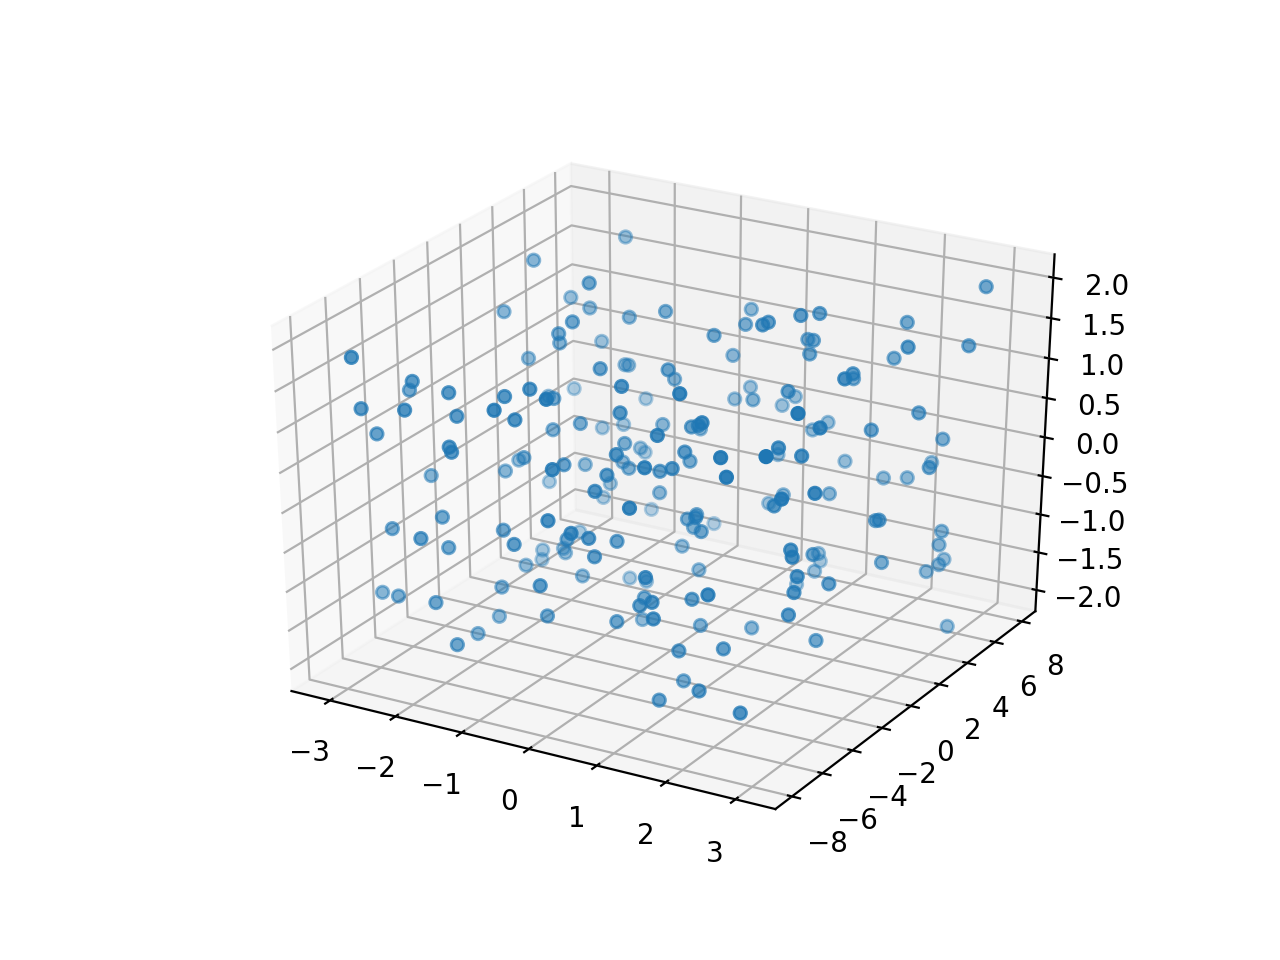

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2])

plt.show()

<IPython.core.display.Javascript object>


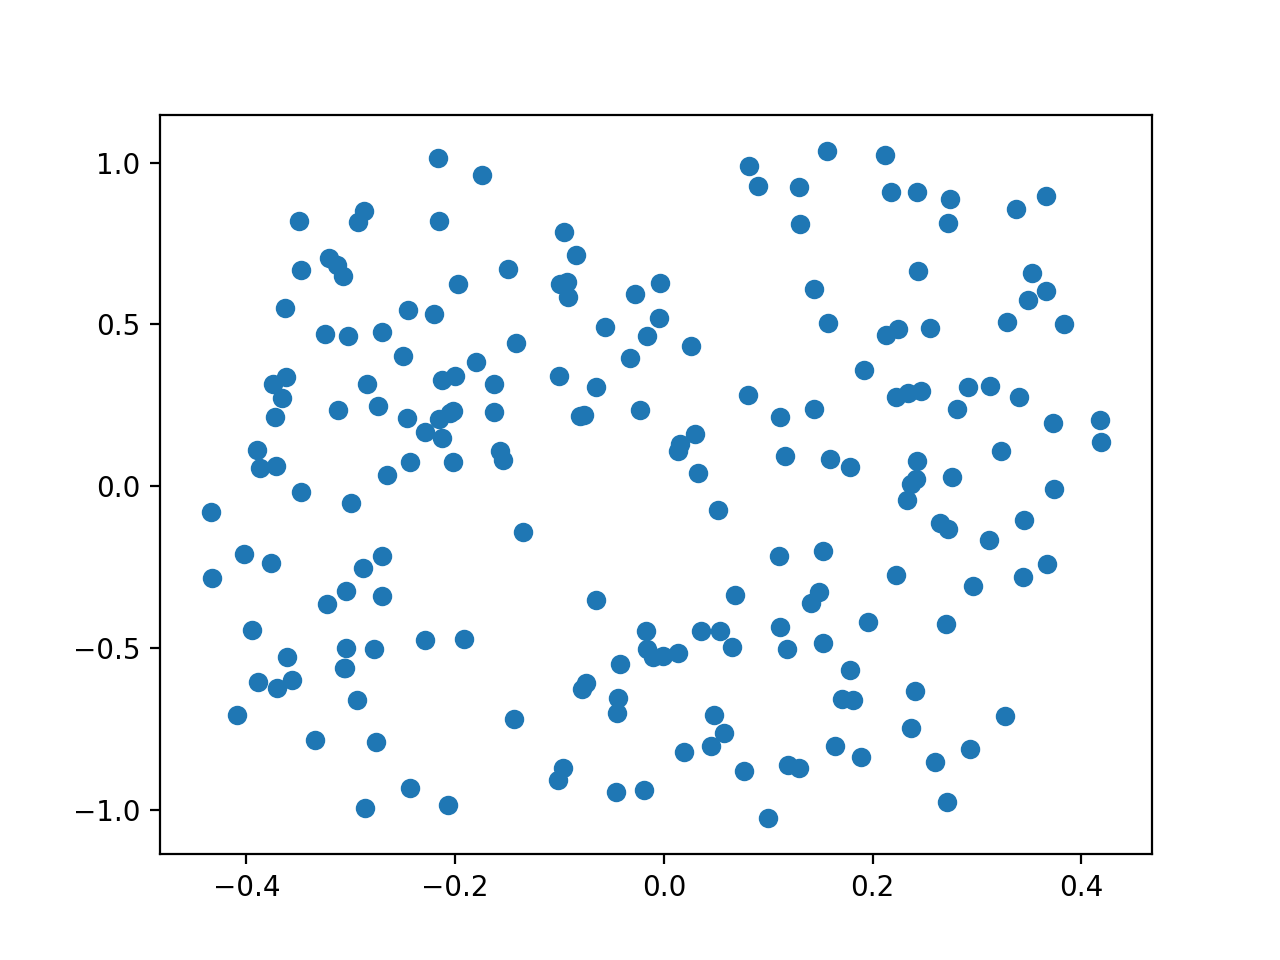

In [26]:
plt.figure()
plt.scatter(y[:, 0], y[:, 1])

<IPython.core.display.Javascript object>


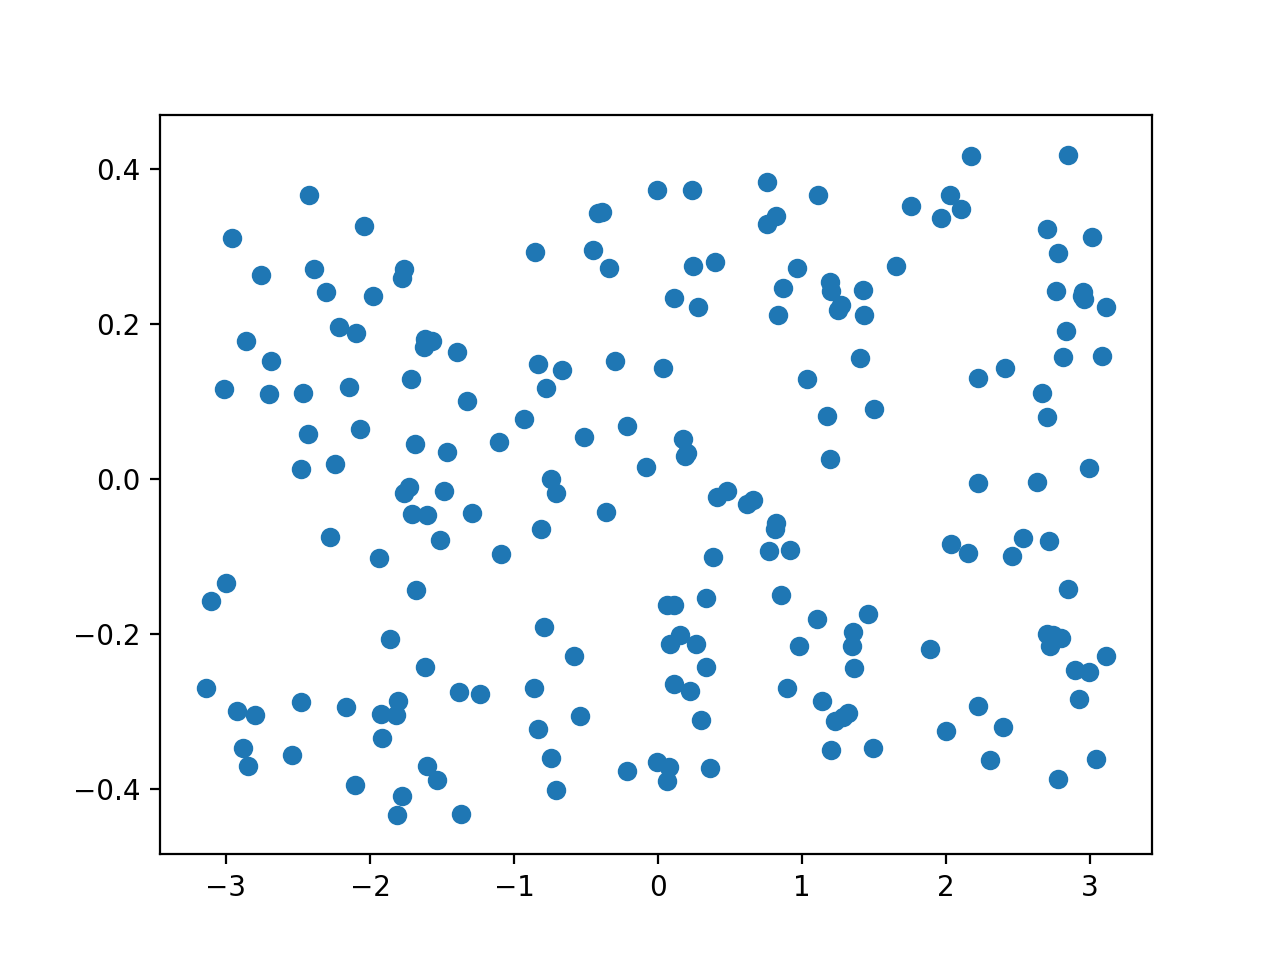

In [28]:
plt.figure()
plt.scatter(x[:,0], y[:,0])